In [128]:
%run "0. config.ipynb"

https://api.redmetrics.io/v1/event.csv?game=0fe53936-027f-461c-b087-b5b5737b2163&gameVersion=51b8a78a-8dd3-4a5e-9f41-01e6805e0f52&entityType=event
48516


# data preparation

In [152]:
players_stats = df_raw.loc[:, ["playerId"]]

players_stats = players_stats.set_index([ "playerId"] )

# intitialisation des colonnes
list_types = list(df_raw.type.unique())

for type_name in list_types:
  players_stats[type_name] = 0

# elle sent la connerie cette boucle...
for i, s in players_stats.iterrows():
#for i, s in players_stats[0:20].iterrows():
  for t in list_types:
    count = int(df_raw[ (df_raw.playerId == i) & (df_raw.type == t ) ].loc[:, ["type"] ].count())
    players_stats.loc[i, t] = count # this will be way faster if we insert rows instead of cells...

# this line proves that there is something rotten with for-loop insertion
players_stats = players_stats.drop_duplicates()
    
#players_stats[players_stats.type.unique()] = 0
players_stats.head(10)

,start,selectmenu,reach,death,pickup,equip,craft,unequip,complete,switch,restart,gotourl,configure,gotomooc
playerId,,,,,,,,,,,,,,
9c183209-8867-46bb-9d29-9dda57e5a7bd,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5af5f837-2aa1-4d5e-86a3-05d39d6cf63d,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3607b3ec-9e2a-4043-9f07-8dbccee66cb3,0,1,8,6,3,3,1,1,1,0,0,0,0,0
ff1cdcfc-9cfe-4b77-8562-3111808000e7,0,1,1,0,0,0,0,0,0,1,0,0,0,0
85de8fbc-b510-47c6-bfcd-ce829712c379,1,5,9,3,1,1,0,0,0,1,0,0,0,0
9fe9e95b-aa85-4a11-a73e-5d460f26e8a2,1,1,8,6,3,2,1,0,1,0,0,0,0,0
b3bfaf2a-9b35-4f53-9909-885d45d19e3a,1,1,9,6,3,3,1,0,0,0,0,0,0,0
0be21833-f660-4b7e-9ce5-fc5acf981d8f,0,1,3,3,1,1,0,0,0,0,0,0,0,0
8a398152-ff4a-4d35-9422-58aafdd7deab,1,2,0,0,0,0,0,0,0,0,1,0,0,0


In [154]:
players_stats.to_csv("data/players_stats.csv")

# PCA YOLO

In [113]:
from sklearn.decomposition import PCA

In [155]:
X = players_stats[ players_stats["complete"] > 0 ].as_matrix()

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

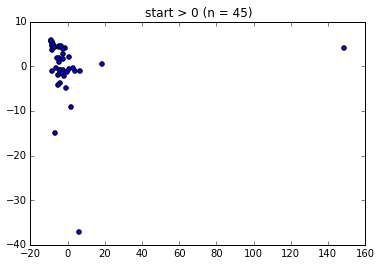

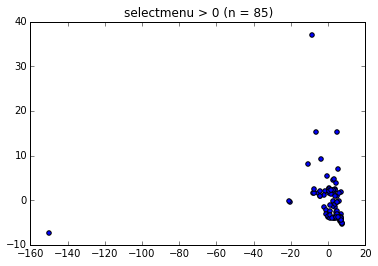

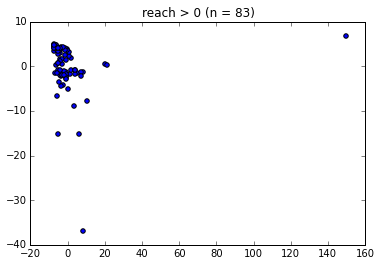

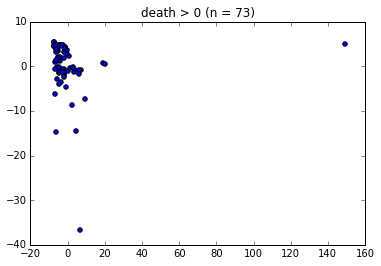

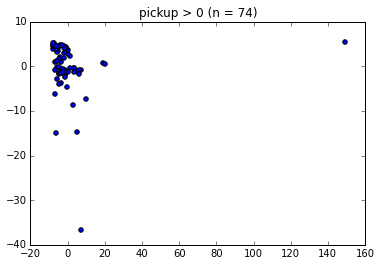

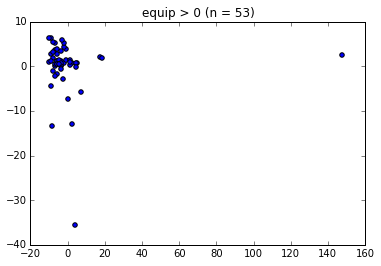

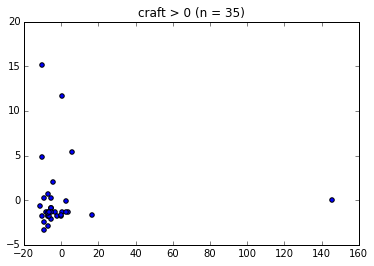

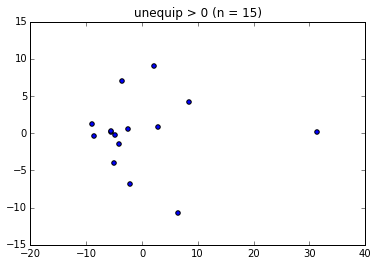

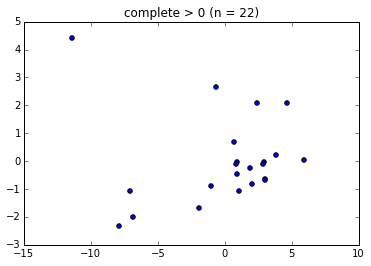

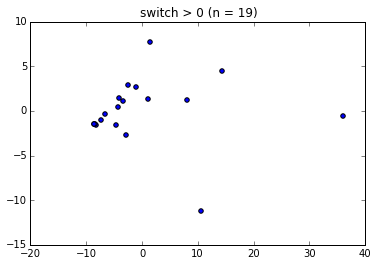

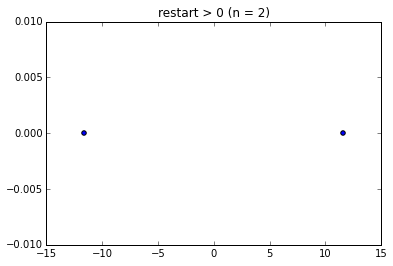

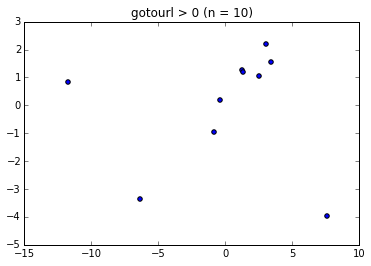

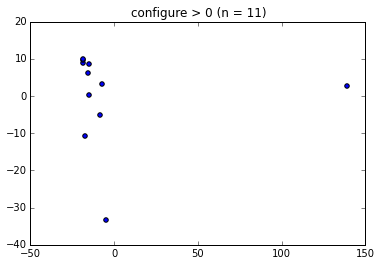

In [161]:
for title in list_types:
  X = players_stats[ players_stats[title] > 0 ].as_matrix()
  n = X.shape[0]
  
  # print X
  # print n
  
  if n > 1:
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)

    plt.figure()
    plt.scatter(X_r[:, 0], X_r[:, 1]) #, c=c, label=target_name)
    plt.title("%s > 0 (n = %s)" % (title, n))
    plt.legend()
  else:
    ""

plt.show();